# Initial data

In [1]:
import pandas as pd
import itertools as iter
import matplotlib.pyplot as plt
import numpy as np

raw_data = pd.read_csv('store_data.csv',header = None)
#raw_data = raw_data.loc[0:5500] # training data
display(raw_data)
records = [] # records = [ {} ]

for i in raw_data.index:
    records.append([str(raw_data.values[i][j]) for j in raw_data.columns if str(raw_data.values[i][j]) != 'nan'])

records = [set(i) for i in records] # loại bỏ duplicate trong 1 giỏ hàng

# Frequent items K = 1
K_1_init = {} # K_1 = { () : {T_ID} }  tuple : set

# Create K_1
for i in range(0,len(records)):
    for j in records[i]:
        j = tuple((j,))
        if j not in K_1_init.keys():
            K_1_init[j] = {i,} 
        else :
            K_1_init[j].add(i)
print("Number of products: ",len(K_1_init))
print("Number of transactions: ",len(raw_data[0]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of products:  120
Number of transactions:  7501


# Data Visualizations

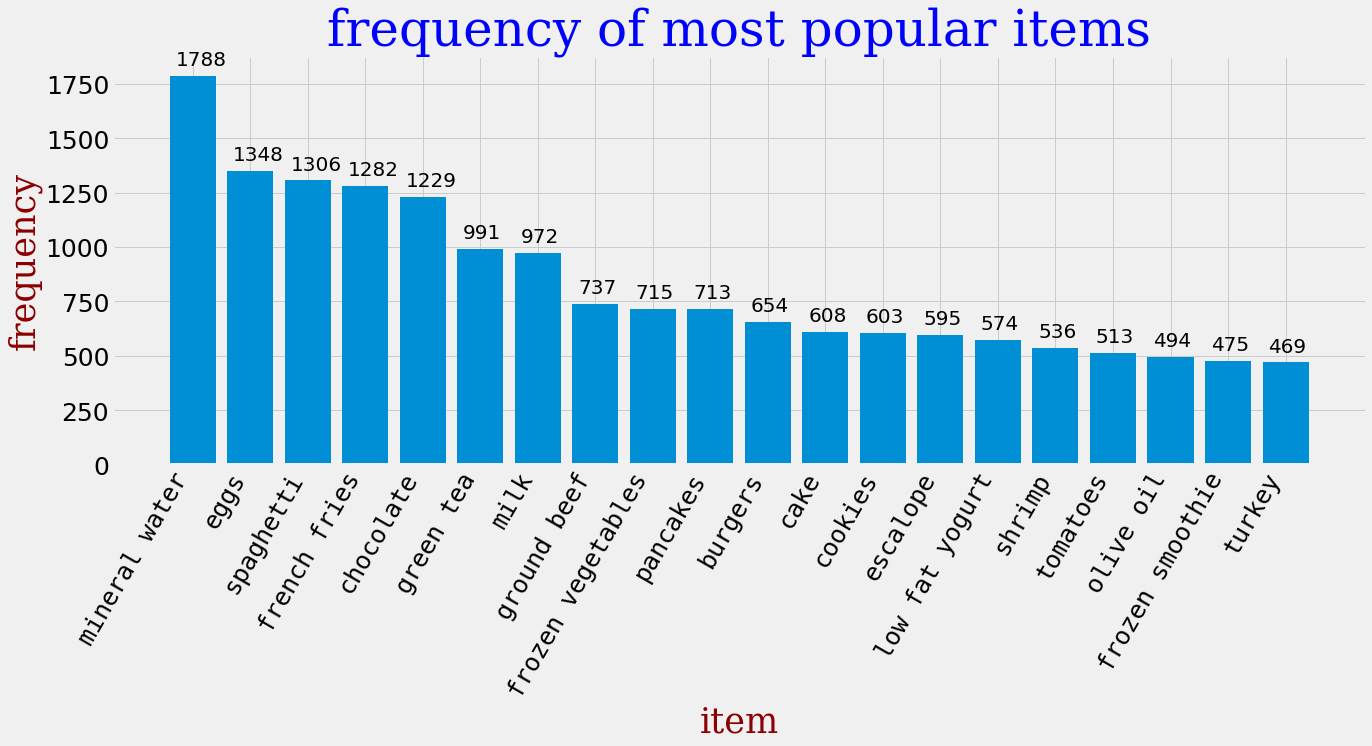

In [2]:
font1 = {'family':'serif','color':'blue','size':50}
font2 = {'family':'serif','color':'darkred','size':35}

#plt.rcParams.update({'figure.autolayout': True})
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('fivethirtyeight')
x = [i[0] for i in K_1_init.keys()]
x.sort(key = lambda i : len(K_1_init[(i,)]),reverse = True)
y = np.array([len(K_1_init[(i,)]) for i in x])

plt.xlabel("item",fontdict = font2)
plt.ylabel("frequency",fontdict = font2)
plt.title("frequency of most popular items",fontdict = font1)
plt.bar(x[:20],y[:20],width = 0.8)
plt.xticks(rotation = 60,fontsize = 25,ha = 'right',fontname='monospace')
plt.yticks(fontsize = 25)
for index,data in enumerate(y[:20]):
    plt.text(x=index-0.3 , y = data+50 , s=f"{data}" , fontdict=dict(fontsize=20))

# Training data

In [3]:
raw_data = raw_data.loc[0:5500] # training data
display(raw_data)
records = [] # records = [ {} ]

for i in raw_data.index:
    records.append([str(raw_data.values[i][j]) for j in raw_data.columns if str(raw_data.values[i][j]) != 'nan'])

records = [set(i) for i in records] # loại bỏ duplicate trong 1 giỏ hàng

# Frequent items K = 1
K_1_init = {} # K_1 = { () : {T_ID} }  tuple : set

# Create K_1
for i in range(0,len(records)):
    for j in records[i]:
        j = tuple((j,))
        if j not in K_1_init.keys():
            K_1_init[j] = {i,} 
        else :
            K_1_init[j].add(i)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,muffins,whole wheat rice,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5497,fresh tuna,spaghetti,vegetables mix,rice,carrots,french fries,champagne,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5498,meatballs,olive oil,clothes accessories,green tea,french fries,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5499,turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Apriori Algorithm

In [4]:
# frequent-items K = 1 
def frequent_1_items(K_1,min_support):
    for x in list(K_1): # list(K_1): create a copy of the keys to be made
        if len(K_1[x])/len(raw_data[0]) < min_support: 
            K_1.pop(x)
    return K_1
                     
        
# Create K-candidate(K >= 2) : cand{ sorted(items) : {T_ID} }
def candidates(items, k):
    cand = {} 
    tmp = [] # tmp[ {set} ] : tránh duplicate vd: (x,y)+(y,z) = (x,y,z) & (x,y)+(z,x) = (x,z,y)
    for i,j in iter.combinations(items.keys(),2):
        inter = set(i).union(set(j)) 
        if (len(inter) == k) and (inter not in tmp):
            tmp.append(inter)
            inter = tuple(sorted((inter))) # sorted để sau này tìm cho dễ
            cand[inter] = items[i].intersection(items[j])
    return cand

# Create frequent-items sets
def frequent_items_set(candidates,min_support):
    cand = candidates
    for i in list(cand):
        if len(cand[i])/len(raw_data[0]) < min_support:
            cand.pop(i)
    return cand

# Apriori algorithm:
def apriori(K_1_init,min_support): 
    K_1 = frequent_1_items(K_1_init,min_support)
    fre_items = []
    fre_items.append(K_1) # fre_items[0] = K_1
    
    k = 2
    #print(fre_items[0])
    while len(fre_items[-1]) > 0:
        fre_item = fre_items[-1]
        candidate = candidates(fre_item,k)
        candidate = frequent_items_set(candidate,min_support)
        k += 1
        fre_items.append(candidate)
    return fre_items

def create_right_side(right,k): # right : [ () ]
    right_items = []
    tmp = [] # 1-2 2-3 = 1-2 1-3
    for i,j in iter.combinations(right,2):
        items = set(i).union(set(j))
        if len(items) == k and items not in tmp:
            tmp.append(items)
            items = tuple(sorted(items))
            right_items.append(items)
    return right_items

def create_rules(freq_items,min_conf):
    association_rules = []
    for freq_item in freq_items[1:len(freq_items)-1]:
        for freq_set in freq_item:
            subsets = [tuple((i,)) for i in freq_set] # right : 1 item 
            rule,right = caculate_conf(freq_items,freq_set,subsets,min_conf)
            association_rules.extend(rule)
            k = 2
            while len(right) > 0  and len(right[0]) < len(freq_set)-1 : # luôn đảm bảo phần bên trái có phần tử
                right = create_right_side(right,k)
                #print(right)
                rule,right = caculate_conf(freq_items,freq_set,right,min_conf)
                #print(rule)
                association_rules.extend(rule)
                k += 1
    return association_rules
    

def caculate_conf(freq_items,supsets,subsets,min_conf):
    rules = [] 
    right_items = [] #right
    for i in subsets: # duyệt mảng phần tử bên phải
        left_items = set(supsets).difference(set(i))
        left_items = tuple(sorted(left_items))
        confident_ratio = len(freq_items[len(supsets)-1][supsets]) / len(freq_items[len(left_items)-1][left_items]) 
        support = len(freq_items[len(supsets)-1][supsets])/len(raw_data[0])
        if confident_ratio >= min_conf: 
            lift_ratio = confident_ratio / len(freq_items[len(i)-1][i])*len(raw_data[0])
            information = (left_items,i,support,confident_ratio,lift_ratio,supsets) ##left,right,confident_ratio,lift
            #if(lift_ratio >= lift):
            rules.append(information)
            right_items.append(i)
    return rules,right_items

# Find min_supp & min_conf

In [5]:
support_array = [0.05,0.01,0.005,0.003]
conf_array = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
res = [[0 for _ in range(len(conf_array))] for _ in range(len(support_array))]

for i in range(len(support_array)):
    tmp = dict(K_1_init)
    freq_items = apriori(tmp,support_array[i])
    for j in range(len(conf_array)):
        association_rules = create_rules(freq_items,conf_array[j])
        res[i][j] = len(association_rules)
support_array = [0.05,0.01,0.005,0.003]
conf_array = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
res = [[0 for _ in range(len(conf_array))] for _ in range(len(support_array))]

for i in range(len(support_array)):
    tmp = dict(K_1_init)
    freq_items = apriori(tmp,support_array[i])
    for j in range(len(conf_array)):
        association_rules = create_rules(freq_items,conf_array[j])
        res[i][j] = len(association_rules)
print(res)

[[8, 3, 0, 0, 0, 0, 0, 0], [183, 74, 25, 4, 0, 0, 0, 0], [699, 336, 120, 31, 4, 0, 0, 0], [1668, 883, 391, 132, 24, 6, 1, 0]]


In [6]:
index = ["Support = "+str(x) for x in support_array]
columns = ["Confidence = "+str(x) for x in conf_array]
df = pd.DataFrame(res,index = index,columns = columns)
df

,Confidence = 0.2,Confidence = 0.3,Confidence = 0.4,Confidence = 0.5,Confidence = 0.6,Confidence = 0.7,Confidence = 0.8,Confidence = 0.9
Support = 0.05,8,3,0,0,0,0,0,0
Support = 0.01,183,74,25,4,0,0,0,0
Support = 0.005,699,336,120,31,4,0,0,0
Support = 0.003,1668,883,391,132,24,6,1,0


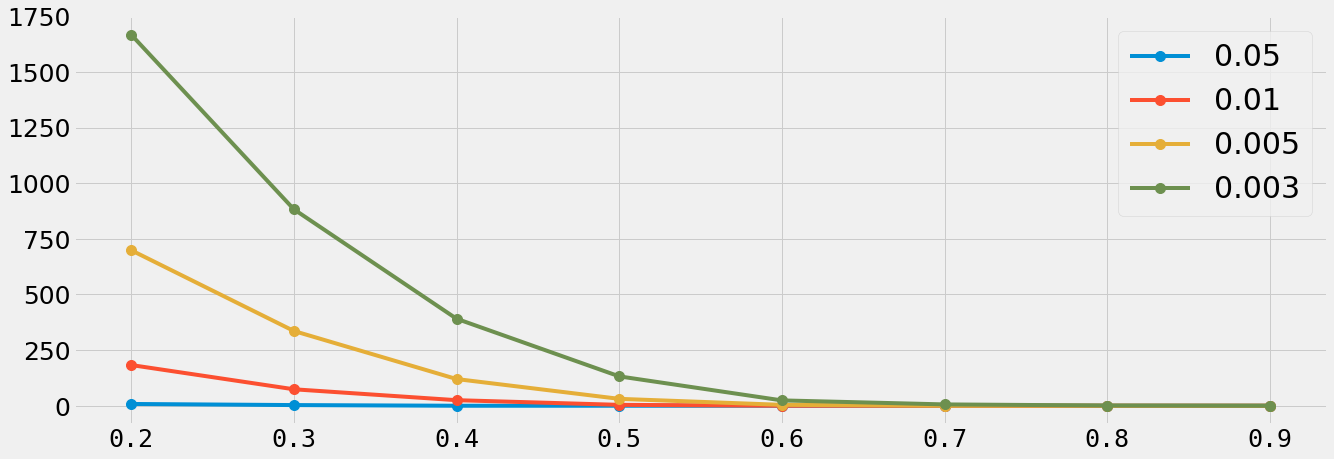

In [7]:
# Visualize 
plt.plot(conf_array,res[0],conf_array,res[1],conf_array,res[2],conf_array,res[3],marker = 'o',linewidth=4,markersize=10)
#plt.margins(x = 0, y = -0.001)
plt.legend(support_array,fontsize=30)
plt.xticks(fontsize = 25,fontname='monospace')
plt.yticks(fontsize = 25)
plt.show()

# Create rules

In [8]:
freq_items = apriori(K_1_init,0.005)
association_rules = create_rules(freq_items,0.5)
support_rules = []
confidence_rules = []
lift_rules = []

dem = 0
for i in association_rules:
        x = i[0]
        y = i[1]
        print("Rule: ",x,'--->',y)
        print("Support: ",i[2])
        print("Confidence: ",i[3])
        print("Lift: ",i[4])
        print('=======================','\n')
        support_rules.append(i[2])
        confidence_rules.append(i[3])
        lift_rules.append(i[4])
        dem+=1
print(dem)

Rule:  ('nonfat milk',) ---> ('mineral water',)
Support:  0.005453553899291038
Confidence:  0.5263157894736842
Lift:  2.149415855898097

Rule:  ('ground beef', 'low fat yogurt') ---> ('mineral water',)
Support:  0.005089983639338302
Confidence:  0.5283018867924528
Lift:  2.1575268591279015

Rule:  ('olive oil', 'shrimp') ---> ('mineral water',)
Support:  0.005453553899291038
Confidence:  0.5555555555555556
Lift:  2.268827847892436

Rule:  ('ground beef', 'shrimp') ---> ('spaghetti',)
Support:  0.006907834939101982
Confidence:  0.5671641791044776
Lift:  3.076893638317289

Rule:  ('eggs', 'olive oil') ---> ('mineral water',)
Support:  0.006907834939101982
Confidence:  0.5507246376811594
Lift:  2.2490989100846757

Rule:  ('milk', 'olive oil') ---> ('mineral water',)
Support:  0.009452826758771132
Confidence:  0.5148514851485149
Lift:  2.102596896660713

Rule:  ('olive oil', 'soup') ---> ('mineral water',)
Support:  0.0058171241592437735
Confidence:  0.6153846153846154
Lift:  2.51316315458

# Visualize result

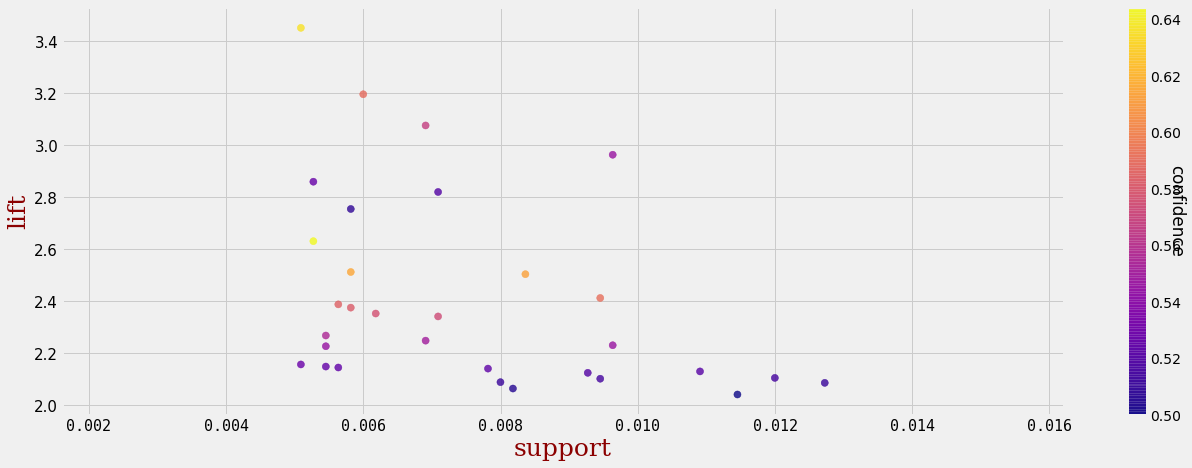

In [9]:
font1 = {'family':'serif','color':'blue','size':25}
font2 = {'family':'serif','color':'darkred','size':25}
colors = np.array(confidence_rules)

plt.scatter(support_rules,lift_rules,s = 50,c = colors,cmap = 'plasma',alpha = 0.8)
#plt.colorbar().ax.get_yaxis().labelpad =100
plt.colorbar().ax.set_ylabel('confidence', rotation=270)
plt.xlabel("support",fontdict = font2)
plt.ylabel("lift",fontdict = font2)
plt.xticks(fontsize = 15,fontname='monospace')
plt.yticks(fontsize = 15)
plt.show()

In [10]:
result = []
for i in association_rules:
    if i[5] not in result and i[4] > 1:
        result.append(i[5])
print(len(result))
result

31


[('mineral water', 'nonfat milk'),
 ('ground beef', 'low fat yogurt', 'mineral water'),
 ('mineral water', 'olive oil', 'shrimp'),
 ('ground beef', 'shrimp', 'spaghetti'),
 ('eggs', 'mineral water', 'olive oil'),
 ('milk', 'mineral water', 'olive oil'),
 ('mineral water', 'olive oil', 'soup'),
 ('frozen vegetables', 'mineral water', 'olive oil'),
 ('chocolate', 'mineral water', 'olive oil'),
 ('eggs', 'mineral water', 'soup'),
 ('cooking oil', 'eggs', 'mineral water'),
 ('eggs', 'ground beef', 'mineral water'),
 ('burgers', 'frozen vegetables', 'mineral water'),
 ('milk', 'mineral water', 'turkey'),
 ('milk', 'mineral water', 'soup'),
 ('frozen vegetables', 'milk', 'mineral water'),
 ('milk', 'mineral water', 'tomatoes'),
 ('ground beef', 'milk', 'mineral water'),
 ('mineral water', 'soup', 'spaghetti'),
 ('frozen vegetables', 'mineral water', 'soup'),
 ('chocolate', 'mineral water', 'soup'),
 ('frozen vegetables', 'ground beef', 'mineral water'),
 ('chicken', 'chocolate', 'mineral wat

# TEST

In [11]:
import pandas as pd
test = pd.read_csv('store_data.csv',header = None)
test = test.loc[5501:]
display(test)
print(test.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5501,burgers,grated cheese,frozen vegetables,spaghetti,milk,salmon,eggs,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5502,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5503,spaghetti,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5504,burgers,spaghetti,eggs,cookies,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5505,eggs,chocolate,cookies,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(2000, 20)


In [12]:
docs = [] # records = [ {} ]

for i in range(len(test[0])):
    docs.append(set([str(test.values[i,j]) for j in test.columns if str(test.values[i,j]) != 'nan']))

word_doc = {} # { : {T_ID} }  tuple : set


for i in range(0,len(docs)):
    for word in docs[i]:
        if word not in word_doc.keys():
            word_doc[word] = {i,} 
        else :
            word_doc[word].add(i)

print(len(word_doc))

117


In [13]:
cnt = 0
for rule in result:
    index = word_doc[rule[0]] # do tập có ít nhất 2 sản phẩm
    #print(index)
    for product in rule:
        index = index.intersection(word_doc[product])
        if len(index) == 0:
            break
    #print(index)
    if len(index) == 0:
        cnt+=1
print("Accuracy :",(len(result) - cnt)/len(result)*100,'%')

Accuracy : 100.0 %
